# MattGraham_HW3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb
import math

#### 4.69 --> Normal distribution
Records maintained by the office of budget in a particular state indicate that the amount of time elapsed between the submission of travel vouchers and the final reimbursement of funds has approximately a normal distribution with a mean of 36 days and a standard deviation of 3 days.

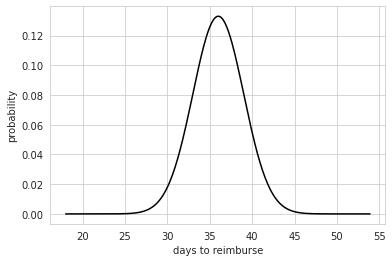

In [3]:
# create distribution
data = np.arange(18, 54, .1)
pdf = stats.norm.pdf(data, loc=36, scale=3)

# visualize
sb.set_style('whitegrid')
sb.lineplot(x=data, y=pdf, color='black')
plt.xlabel('days to reimburse')
plt.ylabel('probability')
plt.show()

In [17]:
# a. What is the probability that the elapsed time between submission and reimbursement will exceed 30 days?
# P(days > 30) 
prob = stats.norm(loc=36, scale=3).cdf(30)
print(f"P(days > 30) = {round(1 - prob, 4)}")

P(days > 30) = 0.9772


In [19]:
# b. If you had a travel voucher submitted more than 55 days ago, what might you conclude?
# P(days > 55)
prob = stats.norm(loc=36, scale=3).cdf(55)
print(f"P(days > 55) = {round(prob, 12)}")

# there is a strong probability that travel reimbursements will not exceed 55 days

P(days > 55) = 0.99999999988


#### 4.72 --> percentiles
The College Boards, which are administered each year to many thousands of high school students, are scored so as to yield a mean of 513 and a standard deviation of 130. These scores are close to being normally distributed. An honor society wishes to invite those scoring in the top 5% on the College Boards to join their society

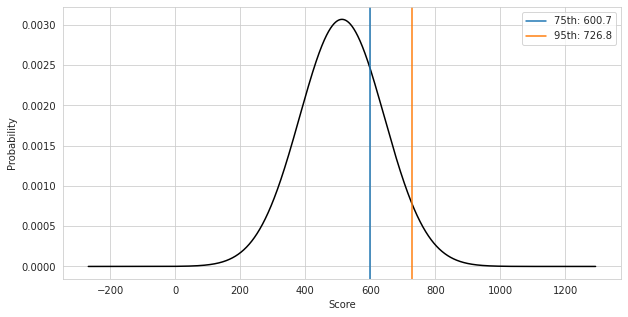

In [6]:
mean = 513
sd = 130
range_v = sd * 6

data = np.arange((mean-range_v),(mean+range_v), .1)
pdf = stats.norm.pdf(data, mean, sd)
ppfs = {}

for ppfv in [.75, .95]:
    p = stats.norm.ppf(ppfv , mean, sd)
    ppfs.update({ppfv*100: p})

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data, pdf, color='k')
ax.set_xlabel("Score")
ax.set_ylabel("Probability")

for i, ppf in enumerate(ppfs):
    ax.axvline(ppfs[ppf], color=f'C{i}', label=f'{ppf:.0f}th: {ppfs[ppf]:.1f}')
ax.legend()
plt.show()

In [7]:
# get 95th percentile
p_95 = stats.norm.ppf(0.95, mean, sd)
print(f"The 95th percentile is: {round(p_95, 4)}")

The 95th percentile is: 726.831


In [8]:
# the 3rd quartile = 75th percentile
p_75 = stats.norm.ppf(0.75, mean, sd)
print(f"The 55th percentile is: {round(p_75, 4)}")

The 55th percentile is: 600.6837


#### 4.79 --> Sample mean z-scores and percentiles
Psychomotor retardation scores for a particular group of manic-depressive patients have approximately a normal distribution
with a mean of 930 and a standard deviation of 130. A random sample of 20 patients from the group was selected, and their mean 
psychomotor retardation score was obtained

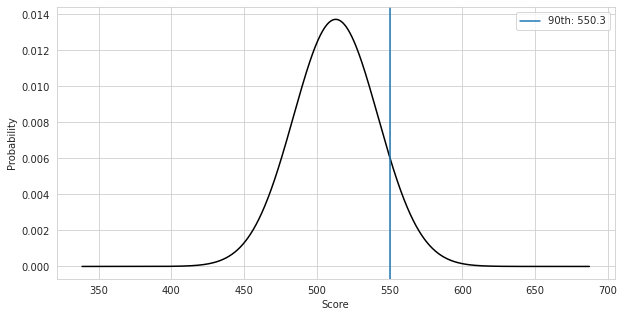

In [9]:
mu = mu_sample = 930
sigma = 130
n = 20
sigma_sample = sigma / math.sqrt(n)
range_v = sigma_sample * 6    


data = np.arange((mean-range_v),(mean+range_v), .1)
pdf = stats.norm.pdf(data, mean, sigma_sample)
ppfs = {}

for ppfv in [.90]:
    p = stats.norm.ppf(ppfv , mean, sigma_sample)
    ppfs.update({ppfv*100: p})

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data, pdf, color='k')
ax.set_xlabel("Score")
ax.set_ylabel("Probability")

for i, ppf in enumerate(ppfs):
    ax.axvline(ppfs[ppf], color=f'C{i}', label=f'{ppf:.0f}th: {ppfs[ppf]:.1f}')
ax.legend()
plt.show()

# print(sigma_sample)

In [10]:
# a. What is the probability that their mean score was between 900 and 960?
lower = 900
upper = 960

z_lower = (lower - mu_sample) / sigma_sample
# print(z_lower)

z_upper = (upper - mu_sample) / sigma_sample
# print(z_upper)

# sf only accepts absolute values
p_lower = stats.norm.sf(abs(z_lower))

# must subtract 1 to obtain "inverse" selection. all area is to the right. Two-tails arae usually multiplied by 2
# e.g. p_z_score = stats.norm.sf(abs(z_score))
p_upper = 1 - stats.norm.sf(abs(z_upper))

p_val = p_upper - p_lower

print(f'P({lower} < score < {upper}) = {round(p_val, 4)}')

P(900 < score < 960) = 0.6979


In [11]:
# b. What is the probability that their mean score was greater than 960?
test_val = 960

z_score = (test_val - mu_sample) /sigma_sample

p_val = stats.norm.sf(abs(z_score))
print(f'p(score > {test_val}) = {round(p_val, 4)}')

p(score > 960) = 0.151


In [12]:
# c. What is the 90th percentile of their mean scores?
p = 0.90
z_90 = stats.norm.ppf(p)
# print(f"z = {round(z_90, 4)}")

p_val = stats.norm.sf(abs(z_90))
# print(f"P(x = {round(z_90, 4)}) = {round(p_val, 4)}")

p_90_score = (z_90 * sigma_sample) + mu_sample
print(f"90th percentile score: {round(p_90_score, 4)}")

90th percentile score: 967.2533


#### 4.82 --> Population mean z-score
Based on the 1990 census, the number of hours per day adults spend watching television is approximately normally distributed with a mean of 5 hours and a standard deviation of 1.3 hours

In [13]:
mu = mu_sample = 5
sigma = 1.3

In [20]:
# a. What proportion of the population spends more than 7 hours per day watching television? 
test_val = 7
z_score = (test_val - mu) / sigma
# print(z_score)

# sf returns area to the right of the curve
p_score = stats.norm.sf(abs(z_score))
print(f"Population proportion watching > {test_val} hours of television per day: {round(p_score, 4)}")

Population proportion watching > 7 hours of television per day: 0.062


In [21]:
# b. In a 1998 study of television viewing, a random sample of 500 adults reported that the average number of hours spent viewing 
# television was greater than 5.5 hours per day. Do the results of this survey appear to be consistent with the 1990 census? 
#
#(Hint: If the census results are still correct, what is the probability that the average viewing time would exceed 5.5 hours?)

n = 500

sigma_sample = sigma / math.sqrt(n)
    
test_val = 5.5
z_score = (test_val - mu_sample) / sigma_sample

# sf returns area to the right of the curve
p_score = stats.norm.sf(abs(z_score))
print(f"Population proportion watching >{test_val} hours of television per day: {round(p_score, 4)}")

# The population does NOT watch more than 5.5 hours per day. in fact...
print(f"P(Population watches < {test_val} per day) = {1 - round(p_score, 4)}")

# This shows that we can conclude that the mean has increased from 5 hours in 1998.
# p(hours > 5.5) = p(hours > 6), we can say this since the probability of 5.5 hours is so small. We can ultimately conclude that 
# the survey is not consistent with 1990 census. 

Population proportion watching >5.5 hours of television per day: 0.0
P(Population watches < 5.5 per day) = 1.0
